In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = {
    'x':np.arange(1,21),
    'y':np.array([0,0,0,1,0,0,0,1,0,1,1,0,1,1,1,0,1,1,1,1])
}
df = pd.DataFrame(data)
df

,x,y
0,1,0
1,2,0
2,3,0
3,4,1
4,5,0
5,6,0
6,7,0
7,8,1
8,9,0
9,10,1


In [3]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='lbfgs')
model.fit(df[['x']],df['y'])


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [4]:
model.predict(df[['x']])
m = model.coef_[0][0]
c = model.intercept_[0]

Probability  (y = 1)



In [7]:
df['probs1'] = 1 / (1 + np.exp(-1 * (m * df['x'] + c)))
df['probs0'] = 1 - df['probs1']
df

,x,y,probs1,probs0
0,1,0,0.099368,0.900632
1,2,0,0.125635,0.874365
2,3,0,0.157630,0.842370
3,4,1,0.195947,0.804053
4,5,0,0.240915,0.759085
5,6,0,0.292449,0.707551
6,7,0,0.349925,0.650075
7,8,1,0.412118,0.587882
8,9,0,0.477249,0.522751
9,10,1,0.543164,0.456836


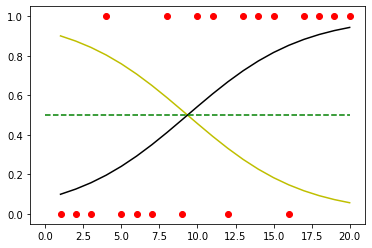

In [13]:
plt.plot(df['x'],df['y'],'ro')
plt.plot(df['x'],df['probs0'],'y-')
plt.plot(df['x'],df['probs1'],'k-')
plt.plot([0,20],[0.5,0.5],'g--')

In [15]:
df['probs1_LOG'] = model.predict_proba(df[['x']])[:,1]
df['probs0_LOG'] = model.predict_proba(df[['x']])[:,0]
df


,x,y,probs1,probs0,probs1_LOG,probs0_LOG
0,1,0,0.099368,0.900632,0.099368,0.900632
1,2,0,0.125635,0.874365,0.125635,0.874365
2,3,0,0.157630,0.842370,0.157630,0.842370
3,4,1,0.195947,0.804053,0.195947,0.804053
4,5,0,0.240915,0.759085,0.240915,0.759085
5,6,0,0.292449,0.707551,0.292449,0.707551
6,7,0,0.349925,0.650075,0.349925,0.650075
7,8,1,0.412118,0.587882,0.412118,0.587882
8,9,0,0.477249,0.522751,0.477249,0.522751
9,10,1,0.543164,0.456836,0.543164,0.456836


In [16]:
# prediksi y threshold 0.8
df["y't0.8"] = df['probs1'].apply(lambda x: 1 if (x > 0.8) else 0)
df

,x,y,probs1,probs0,probs1_LOG,probs0_LOG,y't0.8
0,1,0,0.099368,0.900632,0.099368,0.900632,0
1,2,0,0.125635,0.874365,0.125635,0.874365,0
2,3,0,0.157630,0.842370,0.157630,0.842370,0
3,4,1,0.195947,0.804053,0.195947,0.804053,0
4,5,0,0.240915,0.759085,0.240915,0.759085,0
5,6,0,0.292449,0.707551,0.292449,0.707551,0
6,7,0,0.349925,0.650075,0.349925,0.650075,0
7,8,1,0.412118,0.587882,0.412118,0.587882,0
8,9,0,0.477249,0.522751,0.477249,0.522751,0
9,10,1,0.543164,0.456836,0.543164,0.456836,0


In [17]:
from sklearn.datasets import load_digits
dataDigit = load_digits()


In [18]:
dir(dataDigit)

['DESCR', 'data', 'images', 'target', 'target_names']

8
1797


array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

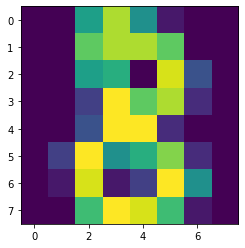

In [25]:
print(dataDigit['target'][8])
print(len(dataDigit['images']))
plt.imshow(dataDigit['images'][8])
dataDigit['data'][0]

In [26]:
df1 = pd.DataFrame(dataDigit['data'])
df1['target'] = dataDigit['target']
df1

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,8
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0,9


In [30]:
from sklearn.model_selection import train_test_split
xtr, xts, ytr, yts = train_test_split(
    df1.drop(['target'],axis='columns'),
    df1['target'],
    test_size=1)

In [31]:
len(xts) + len(xtr)

1797

In [32]:
model = LogisticRegression(solver='liblinear',multi_class = 'auto')
model.fit(xtr,ytr)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [37]:
# print(yts.iloc[0])
# xts.iloc[0]
model.predict([xts.iloc[0]])[0]

4

Text(0.5, 1.0, 'aktual = 4 | Prediksi = 4')

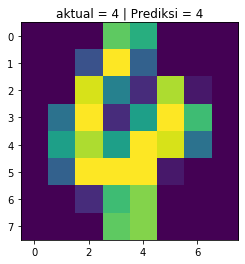

In [47]:
i = 179
plt.imshow(
    np.array(xts.iloc[0].tolist()).reshape(8,8)
)
plt.title(f'aktual = {yts.iloc[0]} | Prediksi = {model.predict([xts.iloc[0]])[0]}')    

In [48]:
# akurasi 
model.score(xts,yts)

1.0

In [49]:
model.score(xtr,ytr)

0.9933184855233853

<hr>


In [52]:
from sklearn.datasets import fetch_olivetti_faces

In [53]:
dataOF = fetch_olivetti_faces()
dir(dataOF)

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to C:\Users\Van\scikit_learn_data


['DESCR', 'data', 'images', 'target']

In [54]:
len(dataOF['images'][0][0])
# total data 400
# @data = 4096

64

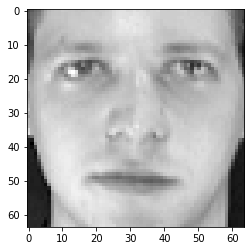

In [56]:
plt.imshow(dataOF['images'][0],cmap='gray')

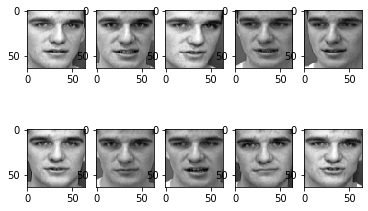

In [60]:
for i in range(10):
    orang = 30
    plt.subplot(2,5,i+1)
    plt.imshow(dataOF['images'][i + (10 * (orang -1))],cmap='gray')


In [61]:
from sklearn.datasets import fetch_lfw_people

In [65]:
datalfw = fetch_lfw_people(min_faces_per_person=70,resize=.5)
dir(datalfw)

['DESCR', 'data', 'images', 'target', 'target_names']

In [66]:
print(np.unique(datalfw['target']))
print(np.unique(datalfw['target_names']))


[0 1 2 3 4 5]
['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Tony Blair']
